BloomTech Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

## Assignment

Complete these tasks for your assignment/project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. Review requirements for your portfolio project on Canvas, and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

 - Target if there is a Great Work Life Balance when certain features are inplace
 - This dataset is going to be a classification problem
 - Evaluation metrics - accuracy score and the AUC (area below the ROC curve)
 - using time-based split for the train, val and test split
 - looks like there is a value in my val set that might be an outlier ['1/1/00'] might 'ignore' as it may have been a typo for the date and do not know what the user meant for that date to be


In [54]:
%%capture
!pip install category_encoders==2.*
!pip install pdpbox==0.2.0

In [61]:
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from pdpbox.pdp import pdp_interact, pdp_isolate, pdp_interact_plot, pdp_plot
import shapely

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Wellbeing_and_lifestyle_data_Kaggle.csv to Wellbeing_and_lifestyle_data_Kaggle.csv


In [6]:
work_life_balance = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv')

In [7]:
work_life_balance

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3/14/21 5:42,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,3/14/21 6:30,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,3/14/21 8:35,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,3/14/21 8:43,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


In [8]:
work_life_balance.isnull().sum()

Timestamp                  0
FRUITS_VEGGIES             0
DAILY_STRESS               0
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIVE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

In [9]:
def wrangle(filepath='Wellbeing_and_lifestyle_data_Kaggle.csv'):
  work_life_balance = pd.read_csv(filepath,
                                parse_dates=['Timestamp'],
                                index_col='Timestamp')
#create a ''GREAT_WLB'' column as target
  work_life_balance['GREAT_WLB'] = work_life_balance['WORK_LIFE_BALANCE_SCORE'].apply(lambda x:1 if (float(x))>=667.0 else 0)

#drop the 'WORK_LIFE_BALANCE_SCORE' column to prevent any data leakage
  work_life_balance.drop(columns='WORK_LIFE_BALANCE_SCORE', inplace=True)

#clean binary encoded columns
  categorical_cols = work_life_balance.select_dtypes('object').columns

#use categorical columms which are basically binary encoded
  binary_cols=[col for col in categorical_cols if work_life_balance[col].nunique()<4]
  #for col in binary_cols:
   #work_life_balance[col] = work_life_balance[col].apply(lambda x:1 if (float(x))>=667.0 else 0)

  return work_life_balance

work_life_balance = wrangle('Wellbeing_and_lifestyle_data_Kaggle.csv')

<ipython-input-9-20a751682c82>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  work_life_balance = pd.read_csv(filepath,


In [10]:
work_life_balance.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15972 entries, 2015-07-07 00:00:00 to 2021-03-14 09:03:00
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FRUITS_VEGGIES     15972 non-null  int64 
 1   DAILY_STRESS       15972 non-null  object
 2   PLACES_VISITED     15972 non-null  int64 
 3   CORE_CIRCLE        15972 non-null  int64 
 4   SUPPORTING_OTHERS  15972 non-null  int64 
 5   SOCIAL_NETWORK     15972 non-null  int64 
 6   ACHIEVEMENT        15972 non-null  int64 
 7   DONATION           15972 non-null  int64 
 8   BMI_RANGE          15972 non-null  int64 
 9   TODO_COMPLETED     15972 non-null  int64 
 10  FLOW               15972 non-null  int64 
 11  DAILY_STEPS        15972 non-null  int64 
 12  LIVE_VISION        15972 non-null  int64 
 13  SLEEP_HOURS        15972 non-null  int64 
 14  LOST_VACATION      15972 non-null  int64 
 15  DAILY_SHOUTING     15972 non-null  int64 
 16  SUFFI

In [11]:
work_life_balance.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,GREAT_WLB
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-07-07,3,2,2,5,0,5,2,0,1,6,...,7,5,5,1,4,0,5,36 to 50,Female,0
2015-07-07,2,3,4,3,8,10,5,2,2,5,...,8,2,2,2,3,2,6,36 to 50,Female,0
2015-07-07,2,3,3,4,4,10,3,2,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,0
2015-07-07,3,3,10,3,10,7,2,5,2,3,...,5,7,5,1,5,2,0,51 or more,Female,0
2015-07-07,5,1,3,3,10,4,2,4,2,5,...,7,0,0,2,8,1,5,51 or more,Female,0


In [12]:
work_life_balance['GREAT_WLB']

Timestamp
2015-07-07 00:00:00    0
2015-07-07 00:00:00    0
2015-07-07 00:00:00    0
2015-07-07 00:00:00    0
2015-07-07 00:00:00    0
                      ..
2021-03-14 05:42:00    0
2021-03-14 06:30:00    1
2021-03-14 08:35:00    1
2021-03-14 08:43:00    1
2021-03-14 09:03:00    0
Name: GREAT_WLB, Length: 15972, dtype: int64

In [13]:
work_life_balance['AGE']

Timestamp
2015-07-07 00:00:00      36 to 50
2015-07-07 00:00:00      36 to 50
2015-07-07 00:00:00      36 to 50
2015-07-07 00:00:00    51 or more
2015-07-07 00:00:00    51 or more
                          ...    
2021-03-14 05:42:00    51 or more
2021-03-14 06:30:00      21 to 35
2021-03-14 08:35:00      21 to 35
2021-03-14 08:43:00      21 to 35
2021-03-14 09:03:00      21 to 35
Name: AGE, Length: 15972, dtype: object

In [14]:
work_life_balance['AGE'].unique()

array(['36 to 50', '51 or more', '21 to 35', 'Less than 20'], dtype=object)

In [ ]:
#Feature Engineering - create new columns by asking a few questions

In [15]:
#Question 1 - How many females per age group - create 4 new columns
#First column['FEMALE_LESS_THAN_20']
mask = (work_life_balance['AGE'] == 'Less than 20') & (work_life_balance['GENDER'] == 'Female')
work_life_balance.loc[mask, 'FEMALE_LESS_THAN_20'] = 1
work_life_balance.loc[~mask, 'FEMALE_LESS_THAN_20'] = 0

In [16]:
work_life_balance['FEMALE_LESS_THAN_20'].value_counts()

FEMALE_LESS_THAN_20
0.0    14907
1.0     1065
Name: count, dtype: int64

In [17]:
#Second column ['FEMALE_21_to_35']
mask1 = (work_life_balance['AGE'] == '21 to 35') & (work_life_balance['GENDER'] == 'Female')
work_life_balance.loc[mask1, 'FEMALE_21_to_35'] = 1
work_life_balance.loc[~mask1, 'FEMALE_21_to_35'] = 0

In [18]:
work_life_balance['FEMALE_21_to_35'].value_counts()

FEMALE_21_to_35
0.0    12431
1.0     3541
Name: count, dtype: int64

In [19]:
#Third Column ['FEMALE_36_to_50']
mask2 = (work_life_balance['AGE'] == '36 to 50') & (work_life_balance['GENDER'] == 'Female')
work_life_balance.loc[mask2, 'FEMALE_36_to_50'] = 1
work_life_balance.loc[~mask2, 'FEMALE_36_to_50'] = 0

In [20]:
work_life_balance['FEMALE_36_to_50'].value_counts()

FEMALE_36_to_50
0.0    13011
1.0     2961
Name: count, dtype: int64

In [21]:
#Fourth column ['FEMALE_51_or_moreto_50']
mask3 = (work_life_balance['AGE'] == '51 or more') & (work_life_balance['GENDER'] == 'Female')
work_life_balance.loc[mask3, 'FEMALE_51_or_more'] = 1
work_life_balance.loc[~mask3, 'FEMALE_51_or_more'] = 0

In [22]:
work_life_balance['FEMALE_51_or_more'].value_counts()

FEMALE_51_or_more
0.0    13681
1.0     2291
Name: count, dtype: int64

In [23]:
1065+3541+2961+2291

9858

In [24]:
(work_life_balance['GENDER'] == 'Female').value_counts()

GENDER
True     9858
False    6114
Name: count, dtype: int64

In [25]:
work_life_balance.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,GREAT_WLB,FEMALE_LESS_THAN_20,FEMALE_21_to_35,FEMALE_36_to_50,FEMALE_51_or_more
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-07-07,3,2,2,5,0,5,2,0,1,6,...,4,0,5,36 to 50,Female,0,0.0,0.0,1.0,0.0
2015-07-07,2,3,4,3,8,10,5,2,2,5,...,3,2,6,36 to 50,Female,0,0.0,0.0,1.0,0.0
2015-07-07,2,3,3,4,4,10,3,2,2,2,...,4,8,3,36 to 50,Female,0,0.0,0.0,1.0,0.0
2015-07-07,3,3,10,3,10,7,2,5,2,3,...,5,2,0,51 or more,Female,0,0.0,0.0,0.0,1.0
2015-07-07,5,1,3,3,10,4,2,4,2,5,...,8,1,5,51 or more,Female,0,0.0,0.0,0.0,1.0


In [26]:
target = 'GREAT_WLB'
y = work_life_balance[target]
X = work_life_balance.drop(target, axis=1)

<Axes: ylabel='GREAT_WLB'>

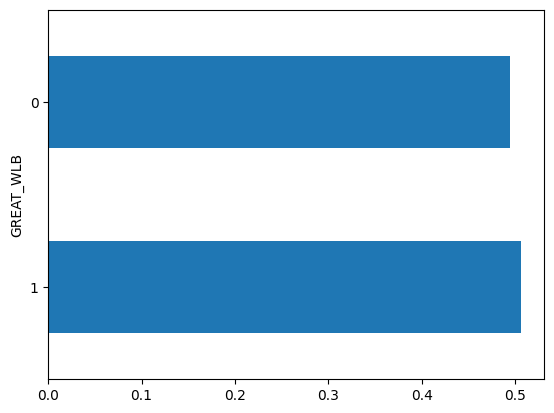

In [27]:
y.value_counts(normalize=True).plot(kind='barh')

In [28]:
y.resample('y').sum()

Timestamp
2015-12-31    1038
2016-12-31    1552
2017-12-31    1416
2018-12-31    1086
2019-12-31    1117
2020-12-31    1678
2021-12-31     188
Freq: A-DEC, Name: GREAT_WLB, dtype: int64

In [29]:
#training set
train_mask = X.index.year<2018
X_train, y_train = X.loc[train_mask], y.loc[train_mask]

In [30]:
#validation set
val_mask = (X.index.year >= 2018) & (X.index.year < 2020)
X_val, y_val = X.loc[val_mask], y.loc[val_mask]

In [31]:
#test set
test_mask = X.index.year>=2020
X_test, y_test = X.loc[test_mask], y.loc[test_mask]

In [32]:
print("Length of X:", len(X))
print("Length of X_train:", len(X_train))
print("Length of X_val:", len(X_val))
print("Length of X_test:", len(X_test))

Length of X: 15972
Length of X_train: 8110
Length of X_val: 4187
Length of X_test: 3675


In [33]:
(X_val).shape

(4187, 26)

In [34]:
assert len(X_train)+len(X_val)+len(X_test) ==len(X)

In [35]:
print('Baseline Accuracy:', y_train.value_counts(normalize=True).max())

Baseline Accuracy: 0.5060419235511714


In [ ]:
#'1/1/00'
#handle_unknown='use_encoded_value', unknown_value=3

In [ ]:
#Model prior to Feature Engineering - adding 4 columns for Female age groups
# model_rf = make_pipeline(
#     OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
#     SimpleImputer(),
#     RandomForestClassifier(n_jobs=-1)
# )

# model_rf.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('simpleimputer', SimpleImputer()),
                ('randomforestclassifier', RandomForestClassifier(n_jobs=-1))])

In [ ]:
#Accuracy score with model prior to Feature Engineering - adding 4 columns for Female age groups
# print('model_rf Training:', model_rf.score(X_train, y_train))
# print('model_rf Validation:',model_rf.score(X_val, y_val))
# model_rf Training: 1.0
# model_rf Validation: 0.929782660616193

model_rf Training: 1.0
model_rf Validation: 0.929782660616193


In [ ]:
#Feature importances using model prior to Feature Engineering - adding 4 columns for Female age groups
# importances = model_rf.named_steps['randomforestclassifier'].feature_importances_

In [35]:
#Feature importances using model prior to Feature Engineering - adding 4 columns for Female age groups
# features=X_train.columns
# pd.Series(importances,index=features).sort_index().tail(10).plot(kind='barh')

In [36]:
#Model_2 after Feature Engineering - adding 4 columns for Female age groups
model_2_rf = make_pipeline(
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    SimpleImputer(),
    RandomForestClassifier(n_jobs=-1)
)

model_2_rf.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('simpleimputer', SimpleImputer()),
                ('randomforestclassifier', RandomForestClassifier(n_jobs=-1))])

In [37]:
#Accuracy score with model_2 after Feature Engineering - adding 4 columns for Female age groups
print('model_2_rf Training:', model_2_rf.score(X_train, y_train))
print('model_2_rf Validation:',model_2_rf.score(X_val, y_val))

model_2_rf Training: 1.0
model_2_rf Validation: 0.9276331502268927


In [38]:
#Feature importances using model_2 after Feature Engineering - adding 4 columns for Female age groups
importances_2 = model_2_rf.named_steps['randomforestclassifier'].feature_importances_

<Axes: >

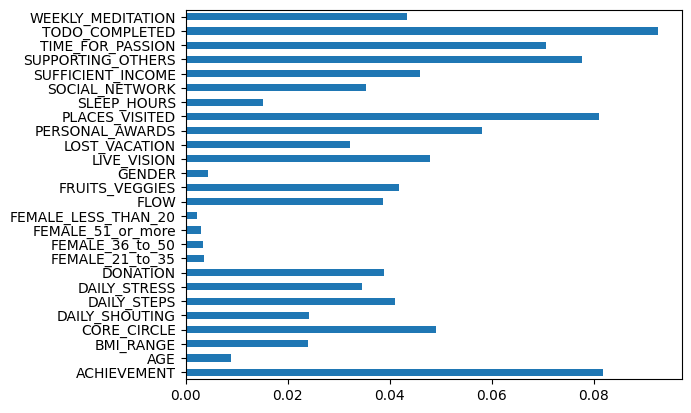

In [39]:
#Feature importances using model_2 after Feature Engineering - adding 4 columns for Female age groups
features_2 =X_train.columns
pd.Series(importances_2,index=features_2).sort_index().plot(kind='barh')

<Axes: >

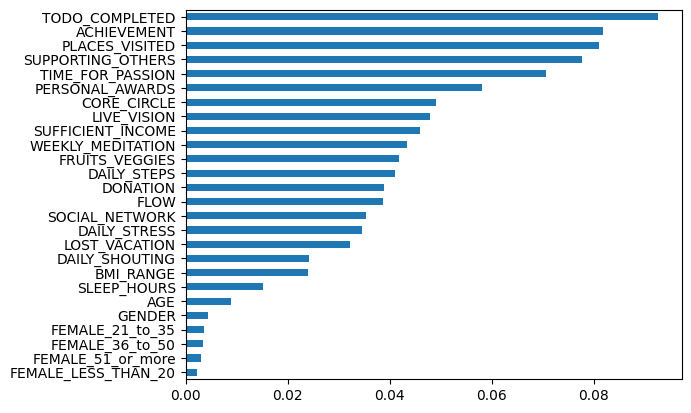

In [40]:
features_2 =X_train.columns
pd.Series(importances_2,index=features_2).sort_values(ascending=True).plot(kind='barh')

Communicating Results:

Using the model_2 after the feature engineering the 4 additional columns categorizing Female's by the Age groups seemed to have lowered the accuracy score of our model_2.

Looking at the feature importances, these new Female by age group features seem to be of lower impact on a great work life balance

In [41]:
#Boosted Model & Permutation Libraries & images & html
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from IPython.display import Image
from IPython.core.display import HTML

In [42]:
# Extreme Gradient Boost Medel

model_2_XGB = make_pipeline(
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    SimpleImputer(strategy='mean'),
    XGBClassifier(random_state=42, n_estimators=75, n_jobs=-1)
)

model_2_XGB.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_me...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=75, n_jobs=-1,
                               num_parallel_tree=None, random_state=42, ...))])

In [43]:
#Accuracy score with model_2_XGB after Feature Engineering - adding 4 columns for Female age groups
print('model_2_rf Training:', model_2_XGB.score(X_train, y_train))
print('model_2_rf Validation:',model_2_XGB.score(X_val, y_val))

model_2_rf Training: 1.0
model_2_rf Validation: 0.9553379508000955


In [44]:
#Feature importances using model_2_XGB after Feature Engineering - adding 4 columns for Female age groups
importances_2_XGB = model_2_XGB.named_steps['xgbclassifier'].feature_importances_

<Axes: >

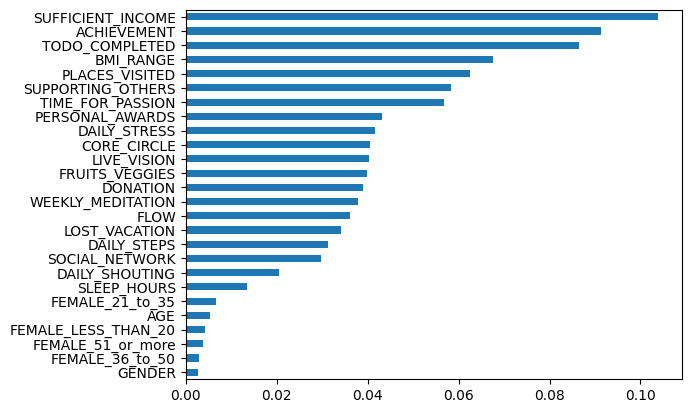

In [45]:
features_2_XGB =X_train.columns
pd.Series(importances_2_XGB,index=features_2_XGB).sort_values(ascending=True).plot(kind='barh')

It now looks like the 'SUFFICIENT_INCOME' is of most importance feature for my prediction model.

In [46]:
# Permutation Importances using automated sklearn function.
#First train my new model with all the features
model_to_permute = make_pipeline(
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    SimpleImputer(),
    XGBClassifier(random_state=42, n_estimators=75, n_jobs=-1)
)

model_to_permute.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_me...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=75, n_jobs=-1,
                               num_parallel_tree=None, random_state=42, ...))])

In [47]:
#Evaluate model_to_permute by using validation data
print('Validation Accuracy:', model_to_permute.score(X_val, y_val))

Validation Accuracy: 0.9553379508000955


In [48]:
#Automated permutation using sklearn function
perm_imp = permutation_importance(model_to_permute, X_val, y_val, random_state=42)

In [49]:
#view list
perm_imp

{'importances_mean': array([ 2.12085025e-02,  2.08741342e-02,  2.91378075e-02,  1.99187963e-02,
         2.13518032e-02,  1.95366611e-02,  1.69094817e-02,  3.19560545e-02,
         4.72892286e-02,  1.67184141e-02,  9.88774779e-03,  2.24982087e-02,
         1.94411273e-02,  2.67494626e-03,  2.99020779e-02,  1.18461906e-02,
         3.93121567e-02,  2.29758777e-02,  1.90589921e-02,  2.42178171e-02,
        -6.20969668e-04, -9.55337951e-04, -4.77668975e-05,  0.00000000e+00,
        -9.55337951e-05, -4.77668975e-05]),
 'importances_std': array([2.27783502e-03, 2.71305886e-03, 1.44884174e-03, 2.04116175e-03,
        2.26880193e-03, 1.89508807e-03, 1.06167236e-03, 1.09343426e-03,
        2.35467066e-03, 3.10668499e-03, 2.66640282e-03, 2.46543834e-03,
        2.72982700e-03, 5.31909660e-04, 2.83157398e-03, 2.92355266e-03,
        1.84135040e-03, 1.03995897e-03, 2.79915650e-03, 1.55957275e-03,
        3.23970861e-04, 5.00983448e-04, 9.55337951e-05, 0.00000000e+00,
        1.91067590e-04, 9.553

In [50]:
#convert list into a table
data_perm = {'imp_mean':perm_imp['importances_mean'],'imp_std':perm_imp['importances_std']}
df_perm = pd.DataFrame(data_perm, index=X_val.columns).sort_values('imp_mean')
df_perm

,imp_mean,imp_std
GENDER,-0.000955,0.000501
AGE,-0.000621,0.000324
FEMALE_36_to_50,-0.000096,0.000191
FEMALE_51_or_more,-0.000048,0.000096
FEMALE_LESS_THAN_20,-0.000048,0.000096
FEMALE_21_to_35,0.000000,0.000000
SLEEP_HOURS,0.002675,0.000532
FLOW,0.009888,0.002666
DAILY_SHOUTING,0.011846,0.002924
TODO_COMPLETED,0.016718,0.003107


Looks like the 4 new columns that I feature engineering Female Age groups are of least importance to this particular predictive model

<Axes: >

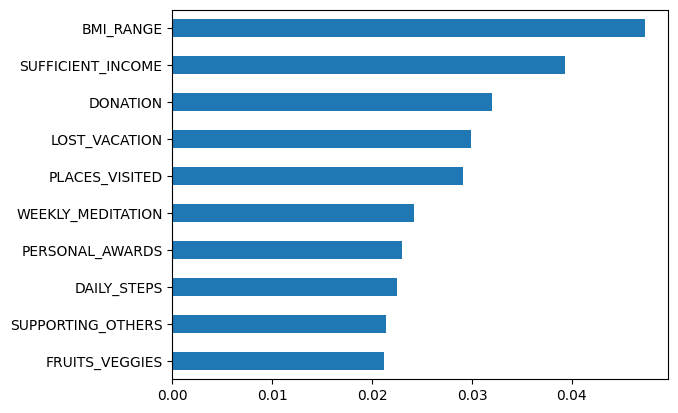

In [51]:
#plot the imp_mean
df_perm['imp_mean'].tail(10).plot(kind='barh')

With the model using permutation on the extreme gradient boost classifier model, the top three features that seem to be of most importance to my predictive model on the 'GREAT_WLB' are: BMI_RANGE, SUFFICIENT_INCOME & DONATION

In [58]:
# pdp_isolate = PDPIsolate
# pdp_interact = PDPInteract

In [50]:
# #install packages
# %%capture
# !pip install pdpbox


In [51]:
# %%capture
# !pip install shap

In [52]:
#import libraries for pdp & shapley
# import pdpbox
# from pdpbox.pdp import PDPInteract, PDPIsolate, PDPInteractPlotEngine, PDPIsolatePlotEngine
# import shap

In [53]:
(X_val).shape

(4187, 26)

In [54]:
(X_val).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4187 entries, 2018-01-01 00:00:00 to 2019-12-31 23:36:00
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FRUITS_VEGGIES       4187 non-null   int64  
 1   DAILY_STRESS         4187 non-null   object 
 2   PLACES_VISITED       4187 non-null   int64  
 3   CORE_CIRCLE          4187 non-null   int64  
 4   SUPPORTING_OTHERS    4187 non-null   int64  
 5   SOCIAL_NETWORK       4187 non-null   int64  
 6   ACHIEVEMENT          4187 non-null   int64  
 7   DONATION             4187 non-null   int64  
 8   BMI_RANGE            4187 non-null   int64  
 9   TODO_COMPLETED       4187 non-null   int64  
 10  FLOW                 4187 non-null   int64  
 11  DAILY_STEPS          4187 non-null   int64  
 12  LIVE_VISION          4187 non-null   int64  
 13  SLEEP_HOURS          4187 non-null   int64  
 14  LOST_VACATION        4187 non-null   int64  
 15  DA

Columns before dropping 'x': Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION',
       'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE',
       'GENDER', 'FEMALE_LESS_THAN_20', 'FEMALE_21_to_35', 'FEMALE_36_to_50',
       'FEMALE_51_or_more'],
      dtype='object')
Columns after dropping 'x': Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION',
       'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE',
       'GENDER', 'FEMALE_LESS_THAN_20', 'FEMALE_21_to_35', 'FEMA

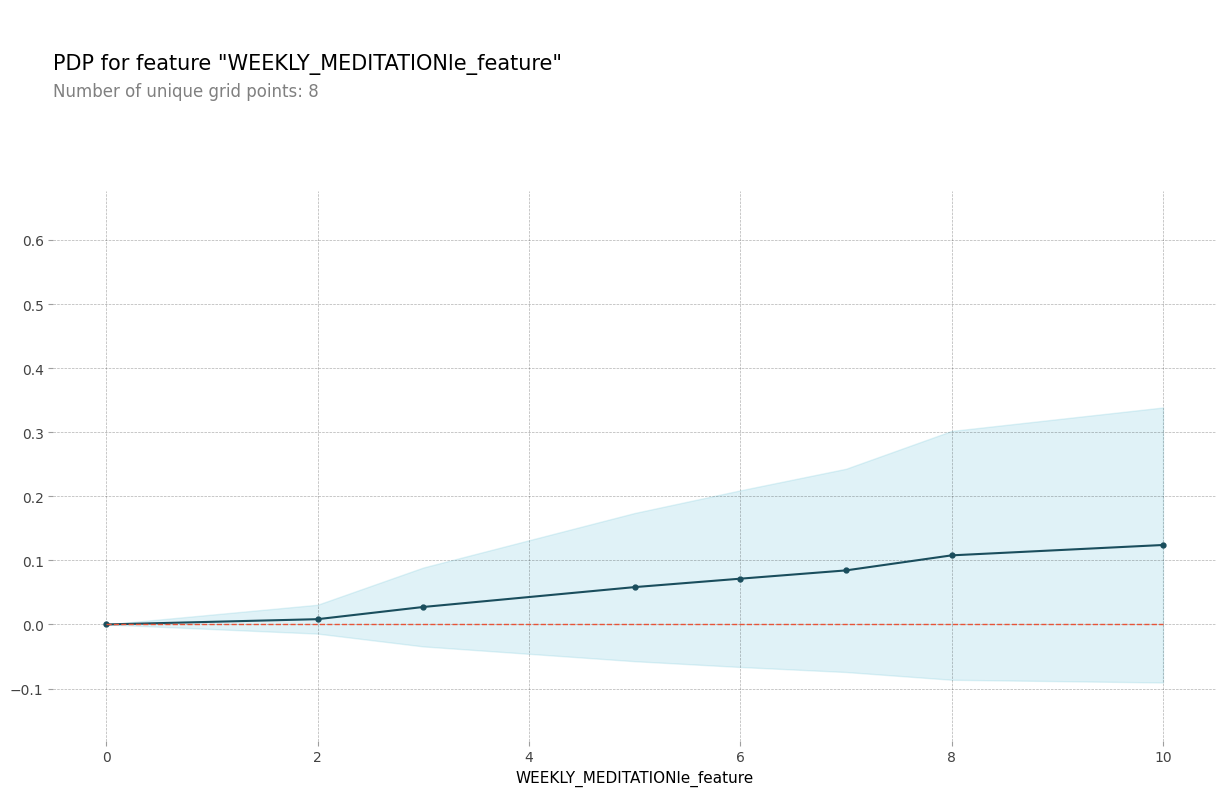

In [62]:
# Print columns before dropping
print("Columns before dropping 'x':", X_val.columns)

# Check if 'x' column exists and drop it
if 'x' in X_val.columns:
    print("Dropping 'x' column")
    X_val = X_val.drop(columns='x')

# Print columns after dropping
print("Columns after dropping 'x':", X_val.columns)

# Define model_features without the 'x' column
# model_features = X_val.columns.tolist()
# if 'x' in model_features:
#     model_features.remove('x')

# Create PDPIsolate object
isolate = pdp_isolate(model_2_XGB,
                      dataset = X_val,
                      model_features=X_val.columns,
                      feature= 'WEEKLY_MEDITATION'
)

pdp_plot_engine = pdp_plot(isolate, feature_name='WEEKLY_MEDITATIONle_feature')

In [63]:
(X_val).shape

(4187, 26)

ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.core.MaskedArray with masked values

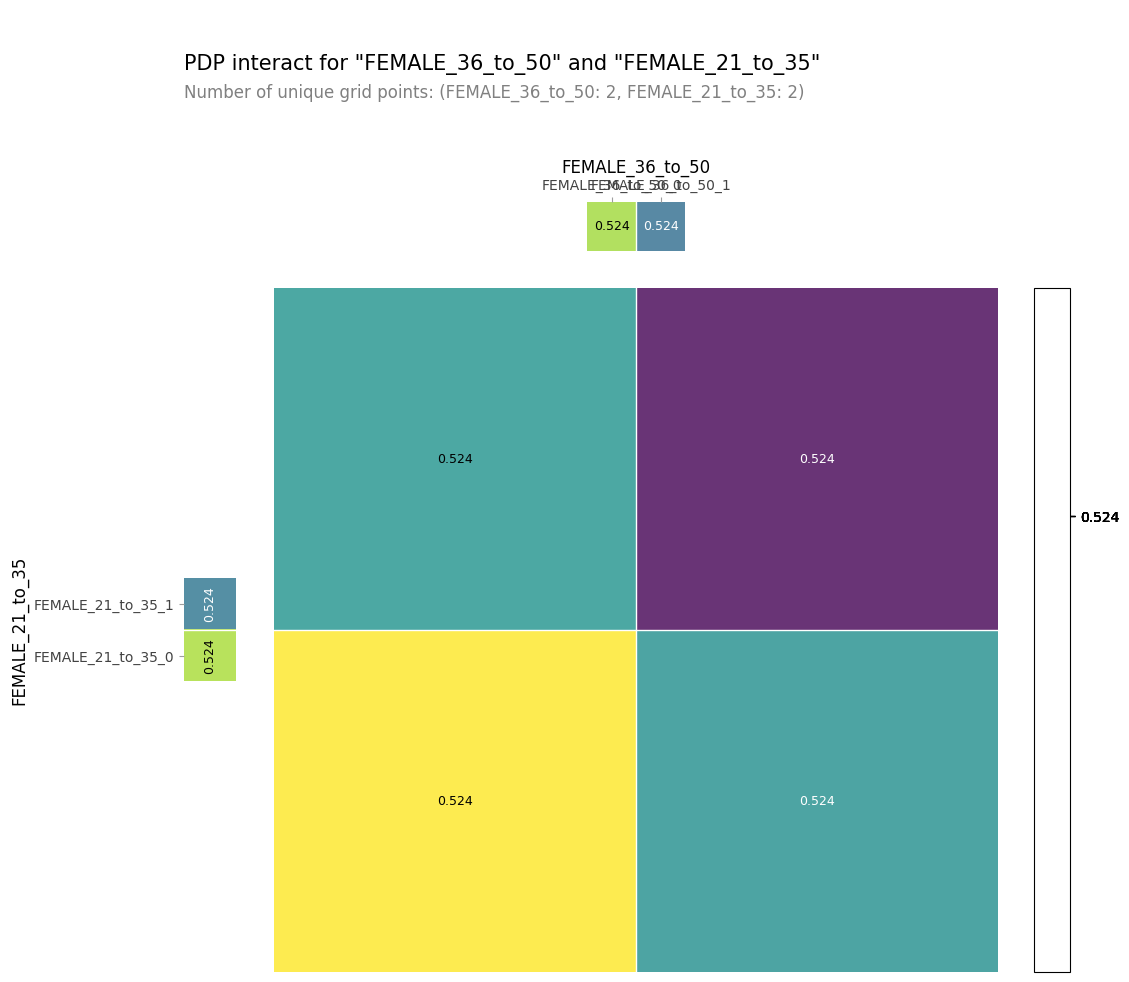

In [67]:
#pdp plot using two features 'FEMALE_36_to_50' & 'FEMALE_21_to_35'

if 'x' in X_val.columns:
  X_val = X_val.drop(columns='x')

sample_two_features = ['FEMALE_36_to_50', 'FEMALE_21_to_35']

X_val_without_na = X_val.dropna()
interact = pdp_interact(model_2_XGB,
                        dataset=X_val,
                        model_features= X_val.columns,
                        features= ['FEMALE_36_to_50', 'FEMALE_21_to_35'],
)

pdp_interact_plot(interact, plot_type='grid', feature_names = ['FEMALE_36_to_50', 'FEMALE_21_to_35'],plot_pdp=True)